<a href="https://colab.research.google.com/github/minanddoost/Logistic-Regression_Neural-Network/blob/main/Logistic_Regression_%26_Neural_Network___Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import csv

## Collecting & Loading Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv('/content/drive//My Drive/Colab Notebooks/Project/sheet.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Filter2DP7DayAverage,Filter1DP7DayAverage,ProcessUnitChargeRateofChange7dayavg,FeedUnitParameter,FeedUnitRundownRate,ProcessUnitParameter1,ProcessUnitParameter2,ProcessUnitParameter3,ProcessUnitParameter4,...,ProcessUnitParameter6,ProcessUnitParameter7,SampleQuality1,SampleQuality2,SampleQuality3,SampleQuality4_4dayavg,SampleQuality5,Sample Quality6,SampleQuality6_4dayavg,ProductQualityIssue
0,1/1/2015 0:00,NaN,NaN,NaN,2.717768,80.019944,0.109743,15.972476,19.386599,13.050659,...,6.852708,25.0,NaN,NaN,NaN,NaN,NaN,0.30,NaN,0
1,1/2/2015 0:00,NaN,NaN,NaN,2.657733,79.968475,0.095579,15.868478,19.170377,13.047152,...,6.700000,25.0,NaN,NaN,NaN,NaN,NaN,0.60,NaN,0
2,1/3/2015 0:00,NaN,NaN,NaN,2.693024,80.008950,0.100365,15.711899,18.846912,13.047497,...,6.744444,25.0,NaN,NaN,NaN,NaN,NaN,0.75,NaN,0
3,1/4/2015 0:00,NaN,NaN,NaN,2.804085,80.002807,0.090540,15.696195,18.700249,13.045583,...,6.314521,25.0,NaN,NaN,NaN,3.35,NaN,0.60,0.56,0
4,1/5/2015 0:00,NaN,NaN,NaN,1.083513,81.306992,0.128478,15.905737,18.672080,13.020702,...,6.328361,25.0,NaN,NaN,NaN,3.30,NaN,0.20,0.54,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2551 non-null   float64
 2   Filter1DP7DayAverage                  2369 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2551 non-null   float64
 4   FeedUnitParameter                     2553 non-null   float64
 5   FeedUnitRundownRate                   2414 non-null   float64
 6   ProcessUnitParameter1                 2553 non-null   float64
 7   ProcessUnitParameter2                 2553 non-null   float64
 8   ProcessUnitParameter3                 2553 non-null   float64
 9   ProcessUnitParameter4                 2551 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

## Cleaning & Manipulating Dataset

In [ ]:
min1 = df['Filter2DP7DayAverage'].min()
df['Filter2DP7DayAverage'].fillna(min1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2369 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2551 non-null   float64
 4   FeedUnitParameter                     2553 non-null   float64
 5   FeedUnitRundownRate                   2414 non-null   float64
 6   ProcessUnitParameter1                 2553 non-null   float64
 7   ProcessUnitParameter2                 2553 non-null   float64
 8   ProcessUnitParameter3                 2553 non-null   float64
 9   ProcessUnitParameter4                 2551 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min2 = df['Filter1DP7DayAverage'].min()
df['Filter1DP7DayAverage'].fillna(min2, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2551 non-null   float64
 4   FeedUnitParameter                     2553 non-null   float64
 5   FeedUnitRundownRate                   2414 non-null   float64
 6   ProcessUnitParameter1                 2553 non-null   float64
 7   ProcessUnitParameter2                 2553 non-null   float64
 8   ProcessUnitParameter3                 2553 non-null   float64
 9   ProcessUnitParameter4                 2551 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min3 = df['ProcessUnitChargeRateofChange7dayavg'].min()
df['ProcessUnitChargeRateofChange7dayavg'].fillna(min3, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 4   FeedUnitParameter                     2553 non-null   float64
 5   FeedUnitRundownRate                   2414 non-null   float64
 6   ProcessUnitParameter1                 2553 non-null   float64
 7   ProcessUnitParameter2                 2553 non-null   float64
 8   ProcessUnitParameter3                 2553 non-null   float64
 9   ProcessUnitParameter4                 2551 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min4 = df['FeedUnitParameter'].min()
df['FeedUnitParameter'].fillna(min4, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 4   FeedUnitParameter                     2557 non-null   float64
 5   FeedUnitRundownRate                   2414 non-null   float64
 6   ProcessUnitParameter1                 2553 non-null   float64
 7   ProcessUnitParameter2                 2553 non-null   float64
 8   ProcessUnitParameter3                 2553 non-null   float64
 9   ProcessUnitParameter4                 2551 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min5 = df['FeedUnitRundownRate'].min()
df['FeedUnitRundownRate'].fillna(min5, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 4   FeedUnitParameter                     2557 non-null   float64
 5   FeedUnitRundownRate                   2557 non-null   float64
 6   ProcessUnitParameter1                 2553 non-null   float64
 7   ProcessUnitParameter2                 2553 non-null   float64
 8   ProcessUnitParameter3                 2553 non-null   float64
 9   ProcessUnitParameter4                 2551 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min6 = df['ProcessUnitParameter1'].min()
df['ProcessUnitParameter1'].fillna(min6, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 4   FeedUnitParameter                     2557 non-null   float64
 5   FeedUnitRundownRate                   2557 non-null   float64
 6   ProcessUnitParameter1                 2557 non-null   float64
 7   ProcessUnitParameter2                 2553 non-null   float64
 8   ProcessUnitParameter3                 2553 non-null   float64
 9   ProcessUnitParameter4                 2551 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min7 = df['ProcessUnitParameter2'].min()
df['ProcessUnitParameter2'].fillna(min7, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 4   FeedUnitParameter                     2557 non-null   float64
 5   FeedUnitRundownRate                   2557 non-null   float64
 6   ProcessUnitParameter1                 2557 non-null   float64
 7   ProcessUnitParameter2                 2557 non-null   float64
 8   ProcessUnitParameter3                 2553 non-null   float64
 9   ProcessUnitParameter4                 2551 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min8 = df['ProcessUnitParameter3'].min()
df['ProcessUnitParameter3'].fillna(min8, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 4   FeedUnitParameter                     2557 non-null   float64
 5   FeedUnitRundownRate                   2557 non-null   float64
 6   ProcessUnitParameter1                 2557 non-null   float64
 7   ProcessUnitParameter2                 2557 non-null   float64
 8   ProcessUnitParameter3                 2557 non-null   float64
 9   ProcessUnitParameter4                 2551 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min9 = df['ProcessUnitParameter4'].min()
df['ProcessUnitParameter4'].fillna(min9, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Filter2DP7DayAverage                  2557 non-null   float64
 1   Filter1DP7DayAverage                  2557 non-null   float64
 2   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 3   FeedUnitParameter                     2557 non-null   float64
 4   FeedUnitRundownRate                   2557 non-null   float64
 5   ProcessUnitParameter1                 2557 non-null   float64
 6   ProcessUnitParameter2                 2557 non-null   float64
 7   ProcessUnitParameter3                 2557 non-null   float64
 8   ProcessUnitParameter4                 2557 non-null   float64
 9   ProcessUnitParameter5                 2557 non-null   float64
 10  ProcessUnitParameter6                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min10 = df['ProcessUnitParameter5'].min()
df['ProcessUnitParameter5'].fillna(min10, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 4   FeedUnitParameter                     2557 non-null   float64
 5   FeedUnitRundownRate                   2557 non-null   float64
 6   ProcessUnitParameter1                 2557 non-null   float64
 7   ProcessUnitParameter2                 2557 non-null   float64
 8   ProcessUnitParameter3                 2557 non-null   float64
 9   ProcessUnitParameter4                 2557 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min11 = df['ProcessUnitParameter6'].min()
df['ProcessUnitParameter6'].fillna(min11, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 4   FeedUnitParameter                     2557 non-null   float64
 5   FeedUnitRundownRate                   2557 non-null   float64
 6   ProcessUnitParameter1                 2557 non-null   float64
 7   ProcessUnitParameter2                 2557 non-null   float64
 8   ProcessUnitParameter3                 2557 non-null   float64
 9   ProcessUnitParameter4                 2557 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min12 = df['ProcessUnitParameter7'].min()
df['ProcessUnitParameter7'].fillna(min12, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Filter2DP7DayAverage                  2557 non-null   float64
 1   Filter1DP7DayAverage                  2557 non-null   float64
 2   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 3   FeedUnitParameter                     2557 non-null   float64
 4   FeedUnitRundownRate                   2557 non-null   float64
 5   ProcessUnitParameter1                 2557 non-null   float64
 6   ProcessUnitParameter2                 2557 non-null   float64
 7   ProcessUnitParameter3                 2557 non-null   float64
 8   ProcessUnitParameter4                 2557 non-null   float64
 9   ProcessUnitParameter5                 2557 non-null   float64
 10  ProcessUnitParameter6                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
round_off_values

0.0

In [ ]:
min13 = df['SampleQuality1'].min()
df['SampleQuality1'].fillna(min13, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 4   FeedUnitParameter                     2557 non-null   float64
 5   FeedUnitRundownRate                   2557 non-null   float64
 6   ProcessUnitParameter1                 2557 non-null   float64
 7   ProcessUnitParameter2                 2557 non-null   float64
 8   ProcessUnitParameter3                 2557 non-null   float64
 9   ProcessUnitParameter4                 2557 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min14 = df['SampleQuality2'].min()
df['SampleQuality2'].fillna(min14, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 4   FeedUnitParameter                     2557 non-null   float64
 5   FeedUnitRundownRate                   2557 non-null   float64
 6   ProcessUnitParameter1                 2557 non-null   float64
 7   ProcessUnitParameter2                 2557 non-null   float64
 8   ProcessUnitParameter3                 2557 non-null   float64
 9   ProcessUnitParameter4                 2557 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min16 = df['SampleQuality4_4dayavg'].min()
df['SampleQuality4_4dayavg'].fillna(min16, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 4   FeedUnitParameter                     2557 non-null   float64
 5   FeedUnitRundownRate                   2557 non-null   float64
 6   ProcessUnitParameter1                 2557 non-null   float64
 7   ProcessUnitParameter2                 2557 non-null   float64
 8   ProcessUnitParameter3                 2557 non-null   float64
 9   ProcessUnitParameter4                 2557 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min18 = df['Sample Quality6'].min()
df['Sample Quality6'].fillna(min18, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 4   FeedUnitParameter                     2557 non-null   float64
 5   FeedUnitRundownRate                   2557 non-null   float64
 6   ProcessUnitParameter1                 2557 non-null   float64
 7   ProcessUnitParameter2                 2557 non-null   float64
 8   ProcessUnitParameter3                 2557 non-null   float64
 9   ProcessUnitParameter4                 2557 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
min19 = df['SampleQuality6_4dayavg'].min()
df['SampleQuality6_4dayavg'].fillna(min19, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2557 non-null   object 
 1   Filter2DP7DayAverage                  2557 non-null   float64
 2   Filter1DP7DayAverage                  2557 non-null   float64
 3   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 4   FeedUnitParameter                     2557 non-null   float64
 5   FeedUnitRundownRate                   2557 non-null   float64
 6   ProcessUnitParameter1                 2557 non-null   float64
 7   ProcessUnitParameter2                 2557 non-null   float64
 8   ProcessUnitParameter3                 2557 non-null   float64
 9   ProcessUnitParameter4                 2557 non-null   float64
 10  ProcessUnitParameter5                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
round= df['ProcessUnitParameter4'].round(decimals = 2)
df['ProcessUnitParameter4'] = df['ProcessUnitParameter4'].replace(round)
df['ProcessUnitParameter4']

0       13.050659
1       13.047152
2       13.047497
3       13.045583
4       13.020702
          ...    
2552    21.808795
2553    20.732886
2554    20.222761
2555    19.468143
2556    19.142750
Name: ProcessUnitParameter4, Length: 2557, dtype: float64

In [ ]:
df.drop("Date", axis=1, inplace=True)

In [ ]:
df.drop("SampleQuality3", axis=1, inplace=True)

In [ ]:
df.drop("SampleQuality5", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Filter2DP7DayAverage                  2557 non-null   float64
 1   Filter1DP7DayAverage                  2557 non-null   float64
 2   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 3   FeedUnitParameter                     2557 non-null   float64
 4   FeedUnitRundownRate                   2557 non-null   float64
 5   ProcessUnitParameter1                 2557 non-null   float64
 6   ProcessUnitParameter2                 2557 non-null   float64
 7   ProcessUnitParameter3                 2557 non-null   float64
 8   ProcessUnitParameter4                 2557 non-null   float64
 9   ProcessUnitParameter5                 2557 non-null   float64
 10  ProcessUnitParameter6                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
df.head(20)

,Filter2DP7DayAverage,Filter1DP7DayAverage,ProcessUnitChargeRateofChange7dayavg,FeedUnitParameter,FeedUnitRundownRate,ProcessUnitParameter1,ProcessUnitParameter2,ProcessUnitParameter3,ProcessUnitParameter4,ProcessUnitParameter5,ProcessUnitParameter6,ProcessUnitParameter7,SampleQuality1,SampleQuality2,SampleQuality4_4dayavg,SampleQuality6_4dayavg,ProductQualityIssue
0,0.02,0.98,0.08,2.717768,80.019944,0.109743,15.972476,19.386599,13.050659,50.087500,6.852708,25.0,0.0,-0.1,0.11,0.09,0
1,0.02,0.98,0.08,2.657733,79.968475,0.095579,15.868478,19.170377,13.047152,53.761181,6.700000,25.0,0.0,-0.1,0.11,0.09,0
2,0.02,0.98,0.08,2.693024,80.008950,0.100365,15.711899,18.846912,13.047497,50.135800,6.744444,25.0,0.0,-0.1,0.11,0.09,0
3,0.02,0.98,0.08,2.804085,80.002807,0.090540,15.696195,18.700249,13.045583,53.072222,6.314521,25.0,0.0,-0.1,3.35,0.56,0
4,0.02,0.98,0.08,1.083513,81.306992,0.128478,15.905737,18.672080,13.020702,59.065209,6.328361,25.0,0.0,-0.1,3.30,0.54,0
5,0.02,0.98,0.08,-0.049330,90.013631,0.117822,15.970843,18.696269,12.912728,46.370549,6.521771,25.0,0.0,-0.1,2.94,0.49,0
6,1.45,0.98,36.86,4.441127,89.978831,0.109044,15.770821,18.395948,12.776048,48.377913,6.871875,25.0,0.0,-0.1,0.93,0.35,0
7,1.42,0.98,51.83,1.619983,98.561667,0.104873,15.654571,18.265235,12.746323,49.748086,6.660070,25.0,0.0,-0.1,2.11,0.25,0
8,1.32,0.98,59.86,1.687349,110.844395,0.097497,15.656398,18.308994,12.990000,46.487520,6.854583,25.0,0.0,-0.1,2.51,0.25,0
9,1.43,0.98,80.42,2.054117,115.009348,0.115975,15.826808,18.594623,12.831157,41.847729,7.112569,25.0,0.0,-0.1,2.38,0.25,0


## Analyzing Dataset

In [ ]:
df.ProductQualityIssue.value_counts()

0    2394
1     163
Name: ProductQualityIssue, dtype: int64

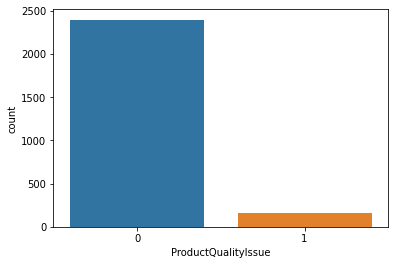

In [ ]:
# one means fail
sns.countplot(x= "ProductQualityIssue", data=df)

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix['ProductQualityIssue'].sort_values(ascending=False))

ProductQualityIssue                     1.000000
SampleQuality6_4dayavg                  0.390473
SampleQuality4_4dayavg                  0.377768
ProcessUnitChargeRateofChange7dayavg    0.191151
SampleQuality1                          0.075151
SampleQuality2                          0.063934
ProcessUnitParameter3                   0.045938
Filter1DP7DayAverage                    0.040460
ProcessUnitParameter1                   0.039348
ProcessUnitParameter2                   0.006911
Filter2DP7DayAverage                    0.006464
ProcessUnitParameter7                  -0.002173
FeedUnitRundownRate                    -0.011142
ProcessUnitParameter5                  -0.039745
ProcessUnitParameter6                  -0.040452
ProcessUnitParameter4                  -0.044755
FeedUnitParameter                      -0.057459
Name: ProductQualityIssue, dtype: float64


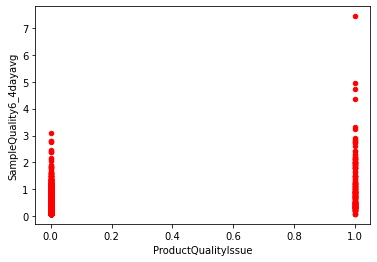

In [ ]:
df.plot(kind="scatter", x="ProductQualityIssue", y="SampleQuality6_4dayavg", color="red")

In [ ]:
x = df.drop("ProductQualityIssue", axis=1)
y = df["ProductQualityIssue"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ffb41c110>,
      dtype=object)

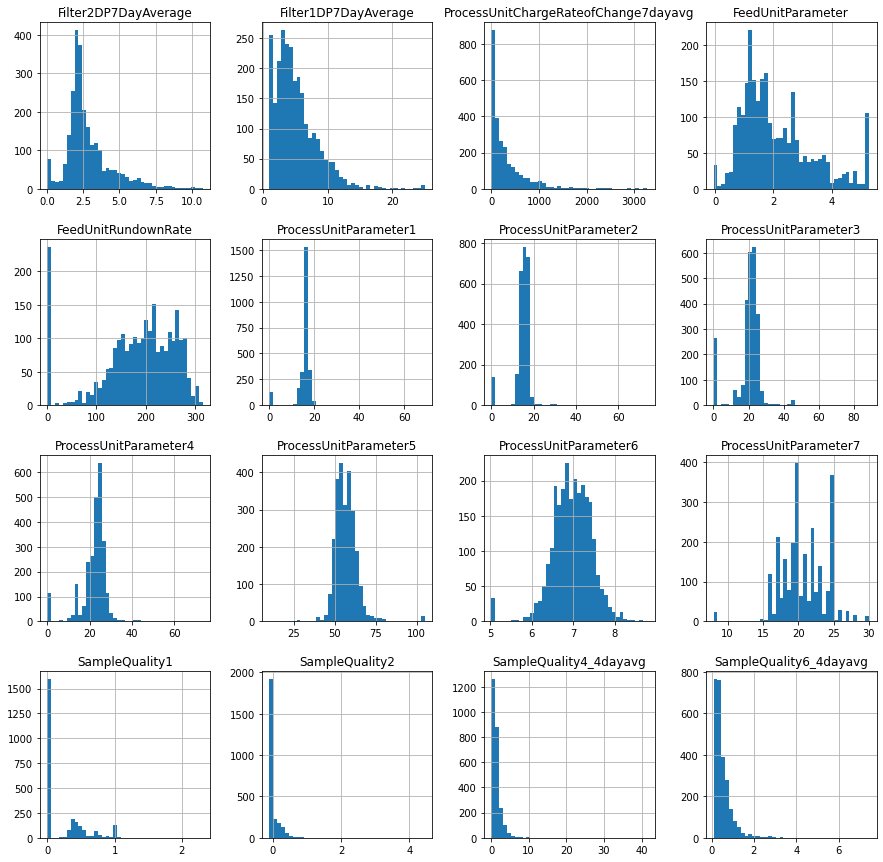

In [ ]:
x.hist(bins=40, figsize=(15,15))

In [ ]:
x.head(12)

,Filter2DP7DayAverage,Filter1DP7DayAverage,ProcessUnitChargeRateofChange7dayavg,FeedUnitParameter,FeedUnitRundownRate,ProcessUnitParameter1,ProcessUnitParameter2,ProcessUnitParameter3,ProcessUnitParameter4,ProcessUnitParameter5,ProcessUnitParameter6,ProcessUnitParameter7,SampleQuality1,SampleQuality2,SampleQuality4_4dayavg,SampleQuality6_4dayavg
0,0.02,0.98,0.08,2.717768,80.019944,0.109743,15.972476,19.386599,13.050659,50.087500,6.852708,25.0,0.0,-0.1,0.11,0.09
1,0.02,0.98,0.08,2.657733,79.968475,0.095579,15.868478,19.170377,13.047152,53.761181,6.700000,25.0,0.0,-0.1,0.11,0.09
2,0.02,0.98,0.08,2.693024,80.008950,0.100365,15.711899,18.846912,13.047497,50.135800,6.744444,25.0,0.0,-0.1,0.11,0.09
3,0.02,0.98,0.08,2.804085,80.002807,0.090540,15.696195,18.700249,13.045583,53.072222,6.314521,25.0,0.0,-0.1,3.35,0.56
4,0.02,0.98,0.08,1.083513,81.306992,0.128478,15.905737,18.672080,13.020702,59.065209,6.328361,25.0,0.0,-0.1,3.30,0.54
5,0.02,0.98,0.08,-0.049330,90.013631,0.117822,15.970843,18.696269,12.912728,46.370549,6.521771,25.0,0.0,-0.1,2.94,0.49
6,1.45,0.98,36.86,4.441127,89.978831,0.109044,15.770821,18.395948,12.776048,48.377913,6.871875,25.0,0.0,-0.1,0.93,0.35
7,1.42,0.98,51.83,1.619983,98.561667,0.104873,15.654571,18.265235,12.746323,49.748086,6.660070,25.0,0.0,-0.1,2.11,0.25
8,1.32,0.98,59.86,1.687349,110.844395,0.097497,15.656398,18.308994,12.990000,46.487520,6.854583,25.0,0.0,-0.1,2.51,0.25
9,1.43,0.98,80.42,2.054117,115.009348,0.115975,15.826808,18.594623,12.831157,41.847729,7.112569,25.0,0.0,-0.1,2.38,0.25


## Train & Test Dataset

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.139044
         Iterations 8
                                   Results: Logit
Model:                    Logit                    Pseudo R-squared:      0.414     
Dependent Variable:       ProductQualityIssue      AIC:                   743.0696  
Date:                     2022-04-03 17:01         BIC:                   836.6150  
No. Observations:         2557                     Log-Likelihood:        -355.53   
Df Model:                 15                       LL-Null:               -606.40   
Df Residuals:             2541                     LLR p-value:           2.4251e-97
Converged:                1.0000                   Scale:                 1.0000    
No. Iterations:           8.0000                                                    
------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[468   6]
 [ 26  12]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       474
           1       0.67      0.32      0.43        38

    accuracy                           0.94       512
   macro avg       0.81      0.65      0.70       512
weighted avg       0.93      0.94      0.93       512



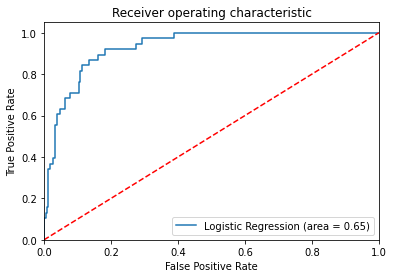

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
original = np.array(df['ProductQualityIssue'].ravel())

In [ ]:
Y_orginal= original[220:270]
Y_orginal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
Y_predicted = y_pred[220:270]
Y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
y_20 = y.iloc[:512].copy()

In [ ]:
y_20.size

512

In [ ]:
x=np.arange(0,50,1)

In [ ]:
x.size

100

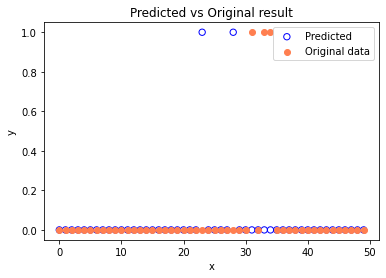

In [ ]:
plt.scatter(x, Y_predicted, s=40, facecolors='none', edgecolors='blue')#plt.scatter(x,y_pred)
plt.scatter(x,Y_orginal,c='coral',alpha=1)#c='lightblue'
plt.legend(["Predicted", "Original data"])
plt.xlabel('x')
# frequency label
plt.ylabel('y')
# plot title
plt.title('Predicted vs Original result')
# showing legend
# function to show the plot

plt.show()

ValueError: ignored

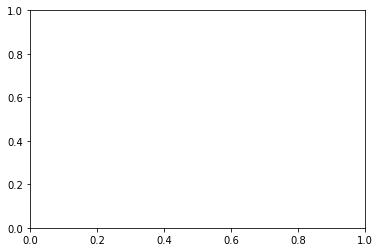

In [ ]:
plt.scatter(x, y_pred, c ="yellow", linewidths = 0.5, marker ="*", edgecolor ="black", s = 20)
plt.scatter(x, y_20, c ="yellow", linewidths = 0.5, marker ="*", edgecolor ="red", s = 20)
# x-axis label
plt.xlabel('x')
# frequency label
plt.ylabel('y')
# plot title
plt.title('Predicted vs Original result')
# showing legend
# function to show the plot
plt.show()

# Optimization of Model

### Variables which have p-values more than 0.1 can be dropped from the x list.
### Variables are the follwoing:
### SampleQuality1, SampleQuality2, ProcessUnitParameter2, ProcessUnitParameter3, FeedUnitParameter, Filter1Day7DayAverage, and Filter2D7DayAverage).

In [ ]:
df_op = df.copy()

In [ ]:
df_op.drop("SampleQuality1", axis=1, inplace=True)

In [ ]:
df_op.drop("SampleQuality2", axis=1, inplace=True)

In [ ]:
df_op.drop("ProcessUnitParameter2", axis=1, inplace=True)

In [ ]:
df_op.drop("ProcessUnitParameter3", axis=1, inplace=True)

In [ ]:
df_op.drop("FeedUnitParameter", axis=1, inplace=True)

In [ ]:
df_op.drop("Filter1DP7DayAverage", axis=1, inplace=True)

In [ ]:
df_op.drop("Filter2DP7DayAverage", axis=1, inplace=True)

In [ ]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 1   FeedUnitRundownRate                   2557 non-null   float64
 2   ProcessUnitParameter1                 2557 non-null   float64
 3   ProcessUnitParameter4                 2557 non-null   float64
 4   ProcessUnitParameter5                 2557 non-null   float64
 5   ProcessUnitParameter6                 2557 non-null   float64
 6   ProcessUnitParameter7                 2557 non-null   float64
 7   SampleQuality4_4dayavg                2557 non-null   float64
 8   SampleQuality6_4dayavg                2557 non-null   float64
 9   ProductQualityIssue                   2557 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 199.9 KB


In [ ]:
x = df_op.drop("ProductQualityIssue", axis=1)
y = df_op["ProductQualityIssue"]

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.140011
         Iterations 8
                                   Results: Logit
Model:                   Logit                    Pseudo R-squared:      0.410      
Dependent Variable:      ProductQualityIssue      AIC:                   734.0156   
Date:                    2022-04-03 17:02         BIC:                   786.6349   
No. Observations:        2557                     Log-Likelihood:        -358.01    
Df Model:                8                        LL-Null:               -606.40    
Df Residuals:            2548                     LLR p-value:           3.4329e-102
Converged:               1.0000                   Scale:                 1.0000     
No. Iterations:          8.0000                                                     
------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[466   8]
 [ 26  12]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       474
           1       0.60      0.32      0.41        38

    accuracy                           0.93       512
   macro avg       0.77      0.65      0.69       512
weighted avg       0.92      0.93      0.92       512



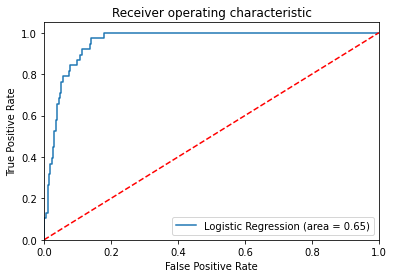

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### References:
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

# Neural Network for Binary Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping

### Selecting the same Dataset as for Logistic Regression

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Filter2DP7DayAverage                  2557 non-null   float64
 1   Filter1DP7DayAverage                  2557 non-null   float64
 2   ProcessUnitChargeRateofChange7dayavg  2557 non-null   float64
 3   FeedUnitParameter                     2557 non-null   float64
 4   FeedUnitRundownRate                   2557 non-null   float64
 5   ProcessUnitParameter1                 2557 non-null   float64
 6   ProcessUnitParameter2                 2557 non-null   float64
 7   ProcessUnitParameter3                 2557 non-null   float64
 8   ProcessUnitParameter4                 2557 non-null   float64
 9   ProcessUnitParameter5                 2557 non-null   float64
 10  ProcessUnitParameter6                 2557 non-null   float64
 11  ProcessUnitParame

In [ ]:
x = df.drop("ProductQualityIssue", axis=1)
y = df["ProductQualityIssue"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Build a Model
model = Sequential()
model.add(Dense(64, input_shape=(x_test.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# compile the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early Stopping is to stop the training when there is no more improvement in accuracy
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max',
                                   patience=10,
                                   restore_best_weights=True)

history = model.fit(x,
                    y,
                    callbacks=[es],
                    epochs=20,
                    batch_size=100,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1088      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
21/21 [==============================] - 1s 38ms/step - loss: 2.7873 - accuracy: 0.8425 - val_loss: 4.5077 - val_accuracy: 0.8438
Epoch 2/20
21/21 [==============================] - 0s 4ms/step - loss: 0.5362 - accuracy: 0.9271 - val_loss: 1.0685 - val_accuracy: 0.8203
Epoch 3/20
21/21 [=================

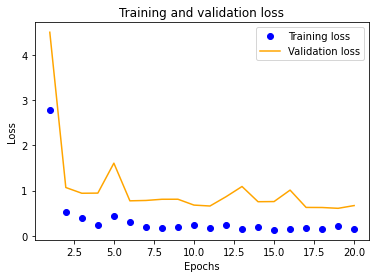

In [ ]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1)

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

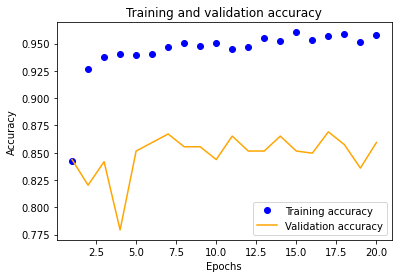

0.869140625

In [ ]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model.predict(x_test)
np.round(model.predict(x_test),0)

preds = np.round(model.predict(x_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds))


print(classification_report(y_test, preds))

[[457  17]
 [ 23  15]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       474
           1       0.47      0.39      0.43        38

    accuracy                           0.92       512
   macro avg       0.71      0.68      0.69       512
weighted avg       0.92      0.92      0.92       512



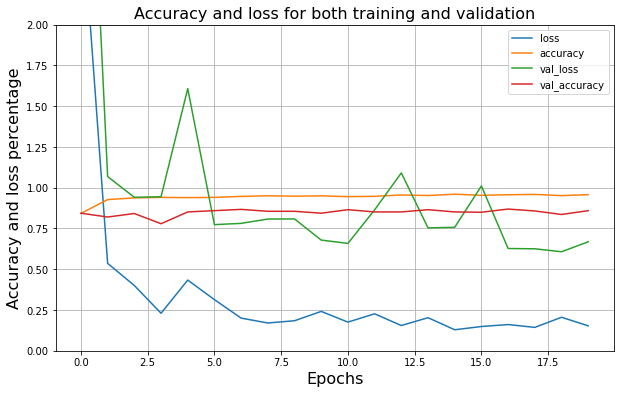

In [ ]:
history_dict = history.history
history_dict.keys()

pd.DataFrame(history_dict).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title('Accuracy and loss for both training and validation', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy and loss percentage', rotation=90, fontsize=16)
plt.show()

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test)
print('Test accuracy:', test_acc)

16/16 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.9219
Test accuracy: 0.921875


In [ ]:
original2 = np.array(df['ProductQualityIssue'].ravel())

In [ ]:
preds = np.array(preds.ravel())

In [ ]:
preds = np.array(preds, dtype=np.int64)

In [ ]:
original2 [80:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
preds[80:100]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### References:
https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-binary-classification-49596d7dcabf